In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('D:\ML_workspace\stock_LSTM_ARIMA\datasets\perrin-freres-monthly-champagne-.csv')

In [2]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.columns

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')

In [6]:
df.columns = ['Month', 'sales']
df.head()

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.shape

(107, 2)

In [8]:
for i in range(len(df)):
    if df['Month'].isnull().sum() >= 1:
        df.dropna(axis=0,inplace=True)

In [9]:
len(df)

105

In [10]:
df.tail()

,Month,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
df.head()

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [12]:
df['Month'].dtype

dtype('O')

In [13]:
df['Month'] = pd.to_datetime(df['Month'])

In [14]:
df['Month'].dtype

dtype('<M8[ns]')

In [15]:
df.set_index('Month', inplace=True)
df.head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [16]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Visualising

<AxesSubplot:xlabel='Month'>

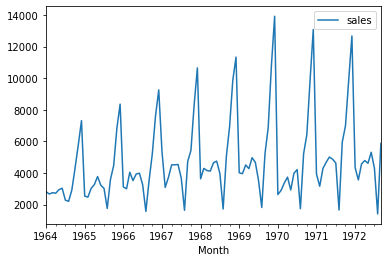

In [17]:
df.plot()

In [18]:
df['sales'][0]

2815.0

# applying adfuller (used for checking if stationary or not)

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
test_result=adfuller(df['sales'])
test_result

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [21]:
# making our own adfuller, with a proper output from a function.
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05: #[1] meaning p-value
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [22]:
print(adfuller_test(df['sales']))

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
None


## Converting to static from non static, by applying differencing method.

In [23]:
# here we are shifting by 12 because our dataset for sales looks seasonal and in a year we have 12 months.
# so insted of shifting by 1, we shift by 12.
# we store it a new column named -- Seasonal First Difference after shifting the values.
df['Seasonal First Difference'] = df['sales'] - df['sales'].shift(12)

In [24]:
df['Seasonal First Difference'].head(40)

Month
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN
1964-06-01       NaN
1964-07-01       NaN
1964-08-01       NaN
1964-09-01       NaN
1964-10-01       NaN
1964-11-01       NaN
1964-12-01       NaN
1965-01-01    -274.0
1965-02-01    -197.0
1965-03-01     276.0
1965-04-01     545.0
1965-05-01     830.0
1965-06-01     194.0
1965-07-01     746.0
1965-08-01    -453.0
1965-09-01     673.0
1965-10-01     173.0
1965-11-01    1074.0
1965-12-01    1045.0
1966-01-01     572.0
1966-02-01     531.0
1966-03-01    1016.0
1966-04-01     257.0
1966-05-01     161.0
1966-06-01     756.0
1966-07-01     232.0
1966-08-01    -186.0
1966-09-01     -67.0
1966-10-01     737.0
1966-11-01     776.0
1966-12-01     897.0
1967-01-01    2262.0
1967-02-01      82.0
1967-03-01    -329.0
1967-04-01     991.0
Name: Seasonal First Difference, dtype: float64

In [25]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [26]:
## therefore we converted our data into static nd stationary.

In [27]:
df['Seasonal First Difference']

# if the p value would have been exactly 0 , it would have been really awesome, but its still very close to 0

Month
1964-01-01      NaN
1964-02-01      NaN
1964-03-01      NaN
1964-04-01      NaN
1964-05-01      NaN
              ...  
1972-05-01   -392.0
1972-06-01    438.0
1972-07-01   -335.0
1972-08-01   -246.0
1972-09-01    -74.0
Name: Seasonal First Difference, Length: 105, dtype: float64

<AxesSubplot:xlabel='Month'>

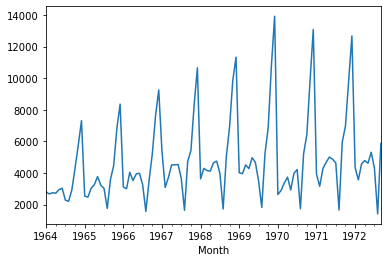

In [28]:
df['sales'].plot()
# 

### CorrelationPlot ( used for knowing how many previous data we need)

In [29]:
from pandas.plotting import autocorrelation_plot


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

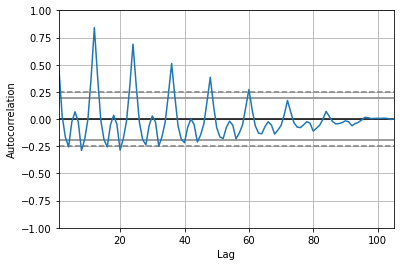

In [30]:
autocorrelation_plot(df['sales'])

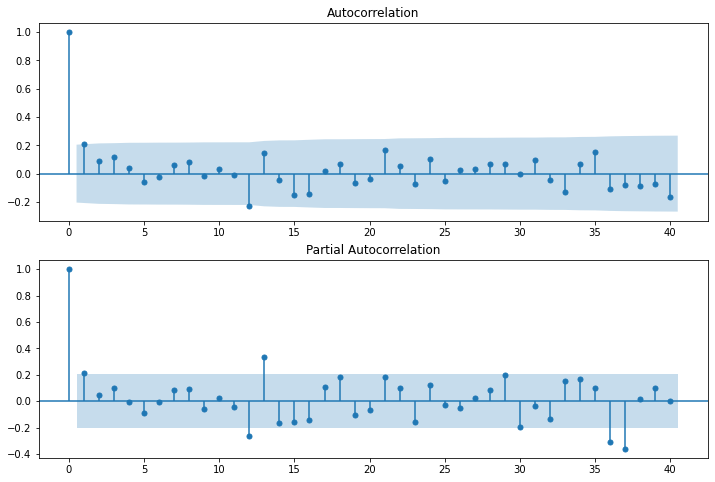

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [32]:
# from the above 2 plots we decide the values for p,d, and q 

# p = 1  ( AR value -- see the pacf plot -- At 1 the plot SUDDEN SHUTS OFF or the values are close to 0)
# d = 1 (because we shifted 12 times just once)
# q = (moving average value ---- in acf we will have exponential decrease TO 0 or 1 

## Now we implement the ARIMA model by putting in p,d,q values.

In [33]:
# As our data was seasonal, this arima model will not give a good prediction.....hence we will use SARIMA for better prediction

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
model = ARIMA(df['sales'],order = (1,1,1))
model_fit_arima = model.fit()

C:\Users\Anshul Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Anshul Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

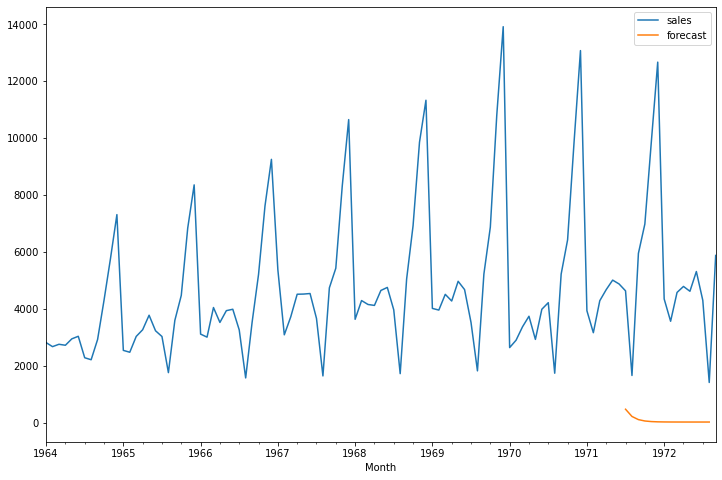

In [36]:
df['forecast'] = model_fit_arima.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

# the above prediction is really terrible, so now we use SARIMA model

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [79]:
model2 = SARIMAX(df['sales'],order=(1,1,1),seasonal_order= (1,1,1,12))
model_fit_sarimax = model2.fit()

C:\Users\Anshul Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Anshul Singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [39]:
import statsmodels.api as sm

<AxesSubplot:xlabel='Month'>

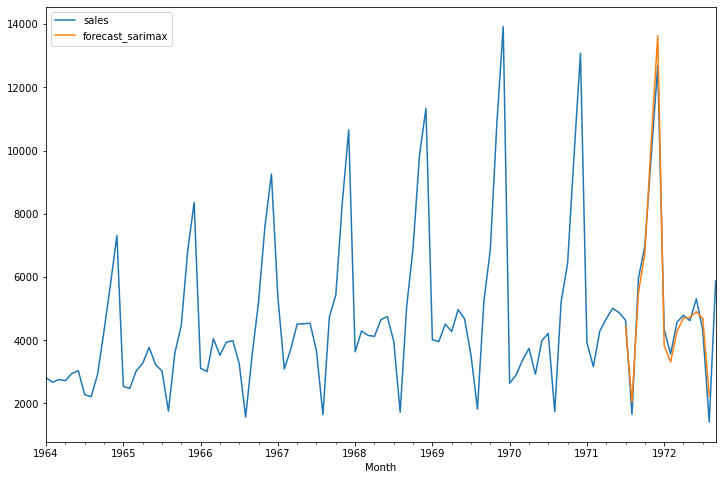

In [80]:
df['forecast_sarimax'] = model_fit_sarimax.predict(start=90,end=103,dynamic = True)
df[['sales','forecast_sarimax']].plot(figsize=(12,8))
# we are plotting over the actual plot just to chefck if everything is working fine

In [41]:
# from the above plot we can see that the predictions come out to be almost perfect or better than the arima model.

# Future Prediction

In [56]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x)for x in range(0,24)]

# making future dates for 24 months.

# ts = pd.Timestamp('2017-01-01 09:10:11')
# ts + DateOffset(months=3)

In [53]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [71]:
df.tail()

,sales,Seasonal First Difference,forecast,forecast_sarimax
Month,,,,
1972-05-01,4618.0,-392.0,22.892883,4717.511110
1972-06-01,5312.0,438.0,22.832011,4906.404129
1972-07-01,4298.0,-335.0,22.805572,4685.436707
1972-08-01,1413.0,-246.0,22.794088,2232.408632
1972-09-01,5877.0,-74.0,NaN,NaN


In [59]:
future_dates # hence we will remove the 0th index of this timestamp.

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [73]:
df.shape

(105, 4)

In [61]:
future_dataset_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_dataset_df

,sales,Seasonal First Difference,forecast,forecast_sarimax
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN


In [63]:
future_df=pd.concat([df,future_dataset_df])
future_df

,sales,Seasonal First Difference,forecast,forecast_sarimax
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,NaN,NaN,NaN
1964-03-01,2755.0,NaN,NaN,NaN
1964-04-01,2721.0,NaN,NaN,NaN
1964-05-01,2946.0,NaN,NaN,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


In [65]:
len(future_df) # previously it was 105 + 23 months more.

128

<AxesSubplot:>

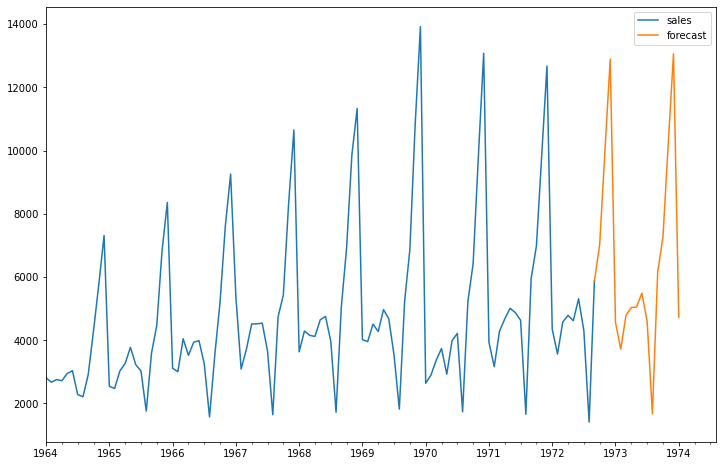

In [81]:
future_df['forecast'] = model_fit_sarimax.predict(start=104,end=120,dynamic=True)
future_df[['sales','forecast']].plot(figsize=(12,8))

In [82]:
future_df.tail(40)

,sales,Seasonal First Difference,forecast,forecast_sarimax
1971-05-01,5010.0,2083.0,NaN,NaN
1971-06-01,4874.0,888.0,NaN,NaN
1971-07-01,4633.0,416.0,NaN,4437.325045
1971-08-01,1659.0,-79.0,NaN,2050.747711
1971-09-01,5951.0,730.0,NaN,5493.376638
1971-10-01,6981.0,557.0,NaN,6752.038830
1971-11-01,9851.0,9.0,NaN,10327.297241
1971-12-01,12670.0,-406.0,NaN,13632.323918
1972-01-01,4348.0,414.0,NaN,3832.961477
1972-02-01,3564.0,402.0,NaN,3313.097072
